# Power Calculations for $\omega=1$ LRTs
### Setup

In [14]:
from __future__ import division

import os
from json import dumps
from collections import defaultdict
from pandas import DataFrame

from IPython.display import Markdown, display, Image
from numpy import percentile
from pymongo import MongoClient
from cogent.maths.stats import chisqprob
from cogent.util.table import Table

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [3]:
try:
    os.mkdir('power')
except OSError:
    pass

### Utility

In [4]:
def printmd(string):
    ''' thanks http://stackoverflow.com/questions/32026727/format-output-of-code-cell-with-markdown '''
    display(Markdown(string))

def print_logs(log,  level='INFO'):
    printmd('##### ' + log.name)
    for d in log.find({'level':level}):
        printmd(dumps(d['message']))
        
def llr(null_col, alt_col, _id):
    null_doc = null_col.find_one({'_id':_id})
    null_lnL = null_doc['lf']['ll']
    alt_doc = alt_col.find_one({'_id':_id})
    alt_lnL = alt_doc['lf']['ll']
    return alt_lnL - null_lnL
    

def lrt_p(null_col, alt_col, _id):
    null_doc = null_col.find_one({'_id':_id})
    null_lnL = null_doc['lf']['ll']
    null_nfp = null_doc['lf']['df']
    alt_doc = alt_col.find_one({'_id':_id})
    alt_lnL = alt_doc['lf']['ll']
    alt_nfp = alt_doc['lf']['df']
    LR = 2.*(alt_lnL - null_lnL)
    if LR < 0.:
        return 1.
    df = alt_nfp - null_nfp
    return chisqprob(LR, df)

In [68]:
%%R
get_plot <- function(df,xlabel,ylabel)
{
    df$omega <- factor(df$omega)
    df$model <- factor(df$model)
    ggplot(df) +
    geom_point(aes(ns_reject, rev_reject)) +
    xlab(xlabel) + ylab(ylabel) +
    geom_abline(slope=1, size=0.1) +
    facet_grid(model ~ omega, labeller=label_parsed)
}

### Load the Data

In [5]:
client = MongoClient()

In [6]:
nulls = {
    'GNC' : client.mammals.GNC_neutral,
    'Y98' : client.mammals.Y98_neutral,
    'CNFGTR': client.mammals.CNFGTR_neutral
}
alts = {
    'GNC' : client.mammals.GNC_power,
    'Y98' : client.mammals.Y98_power,
    'CNFGTR' : client.mammals.CNFGTR_power
}
for col in nulls.values() + alts.values():
    print_logs(getattr(client.mammals, col.name+'.log'))

##### GNC_neutral.log

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_neutral", "kwargs_file": "../config/GNC_neutral.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "omega": "0.0.2-dev"}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_neutral", "kwargs_file": "../config/GNC_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_neutral"]}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_neutral", "kwargs_file": "../config/GNC_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_neutral"]}

{"function": "codon.omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_neutral", "kwargs_file": "../config/GNC_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_omega": "0.0.2-dev"}

##### Y98_neutral.log

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_neutral", "kwargs_file": "../config/Y98_neutral.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "omega": "0.0.2-dev"}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_neutral", "kwargs_file": "../config/Y98_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_neutral"]}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_neutral", "kwargs_file": "../config/Y98_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_neutral"]}

{"function": "codon.omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_neutral", "kwargs_file": "../config/Y98_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_omega": "0.0.2-dev"}

##### CNFGTR_neutral.log

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_neutral", "kwargs_file": "../config/CNFGTR_neutral.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "omega": "0.0.2-dev"}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_neutral", "kwargs_file": "../config/CNFGTR_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_neutral"]}

{"function": "omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_neutral", "kwargs_file": "../config/CNFGTR_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_neutral"]}

{"function": "codon.omega.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_neutral", "kwargs_file": "../config/CNFGTR_neutral.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"neutral": true, "model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_neutral"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_omega": "0.0.2-dev"}

##### GNC_power.log

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_power", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_power", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_power"]}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_power", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_power"]}

{"function": "codon.ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.GNC_power", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_ml": "0.0.12-dev"}

##### Y98_power.log

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_power", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_power", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_power"]}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_power", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_power"]}

{"function": "codon.ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.Y98_power", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_ml": "0.0.12-dev"}

##### CNFGTR_power.log

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_power", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r2537", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.1-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_power", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_power"]}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_power", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_power"]}

{"function": "codon.ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_omega", "output_collection": "mammals.CNFGTR_power", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r405", "input_collections_file": null, "input_collections": ["mammals.data_omega"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_power"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "map_collection_slowly": "0.0.2-dev", "masterslave": "0.0.11-dev", "codon_ml": "0.0.12-dev"}

### Significance using the $\chi^2$ approximation

In [13]:
columns = ['ENSEMBL', 'ns_reject', 'rev_reject', 'omega', 'model']
ps = defaultdict(lambda:defaultdict(lambda:defaultdict(list)))
for model in nulls.keys():
    null_col = nulls[model]
    alt_col = alts[model]
    for doc in null_col.find({}, {'_id':True}):
        aln, omega, sim = doc['_id'].rsplit('_', 2)
        p = lrt_p(null_col, alt_col, doc['_id'])
        ps[omega][model][aln].append(p)
rows = []
for omega in ps.keys():
    for model in ['Y98', 'CNFGTR']:
        for aln in ps[omega][model].keys():
            ns_power = sum(p <= 0.05 for p in ps[omega]['GNC'][aln])/len(ps[omega]['GNC'][aln])
            rev_power = sum(p <= 0.05 for p in ps[omega][model][aln])/len(ps[omega][model][aln])
            omega_str = 'omega == ' + str(float(omega)/10)
            aln = aln.split('_')[0]
            rows.append((aln, ns_power, rev_power, omega_str, model))
table = Table(rows=rows, header=columns)
print table

        ENSEMBL    ns_reject    rev_reject    omega     model
-------------------------------------------------------------
ENSG00000172061       0.8200        1.0000      1.1       Y98
ENSG00000139517       0.3400        0.3900      1.1       Y98
ENSG00000176371       0.0900        1.0000      1.1       Y98
ENSG00000106443       0.3400        0.3300      1.1       Y98
ENSG00000100014       0.5300        0.7100      1.1       Y98
ENSG00000005436       0.4400        0.3700      1.1       Y98
ENSG00000185722       0.6400        0.9800      1.1       Y98
ENSG00000125207       0.4800        0.0400      1.1       Y98
ENSG00000162614       0.2700        0.6500      1.1       Y98
ENSG00000180488       0.3300        0.3900      1.1       Y98
ENSG00000172061       0.8200        1.0000      1.1    CNFGTR
ENSG00000139517       0.3400        0.4100      1.1    CNFGTR
ENSG00000176371       0.0900        0.9900      1.1    CNFGTR
ENSG00000106443       0.3400        0.5300      1.1    CNFGTR
ENSG0000

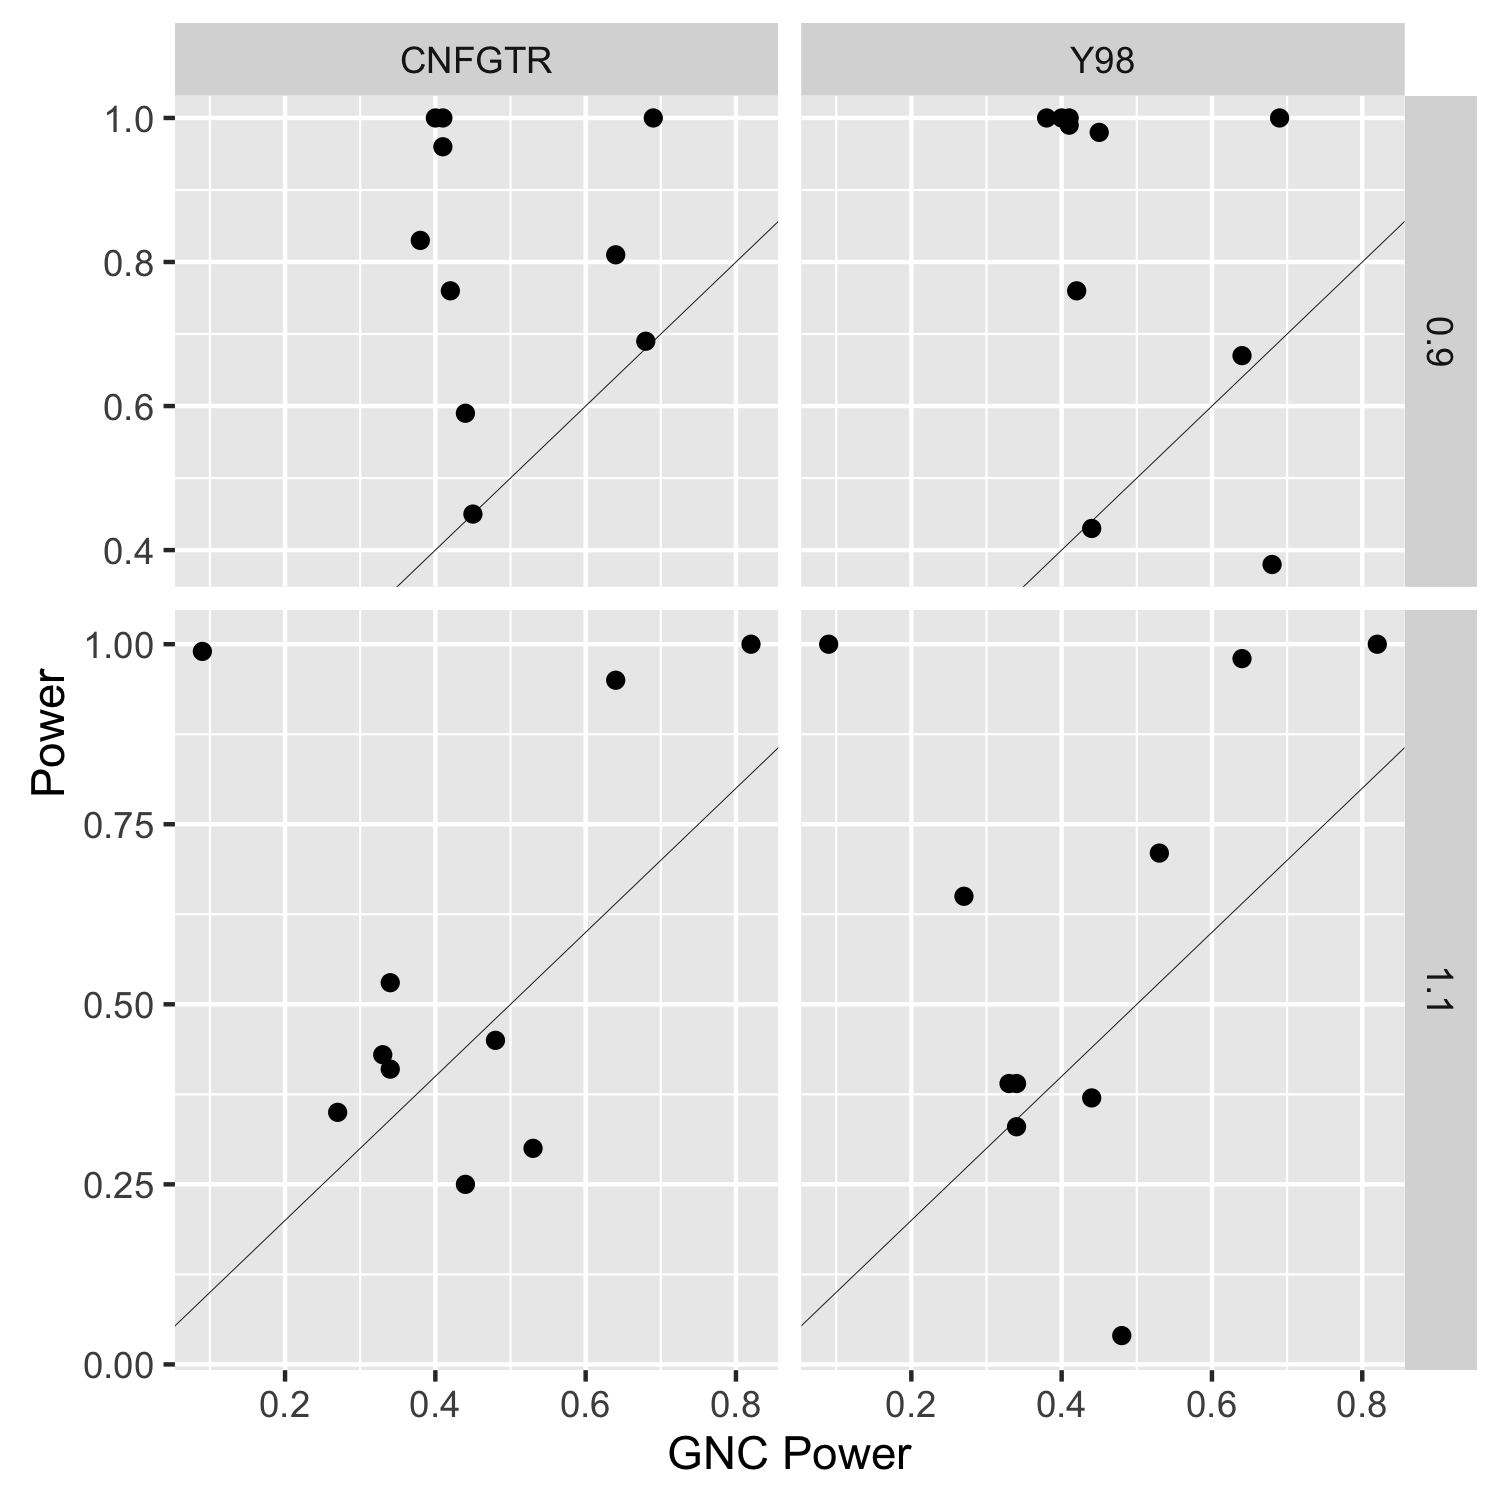

In [21]:
df = DataFrame(rows, columns=columns)
rdf = df[df['omega']!='1.0']
%R -i rdf gg <- get_plot(rdf, 'GNC Power', 'Power')
name = os.path.join('power', 'chi2_power.png')
%R -i name ggsave(name, gg, width=5, height=5)
display(Image(name))

### Significance via simulation

In [69]:
columns = ['ENSEMBL', 'ns_reject', 'rev_reject', 'omega', 'model', 'ns_sig', 'rev_sig']
llrs = defaultdict(lambda:defaultdict(lambda:defaultdict(list)))
for model in nulls.keys():
    null_col = nulls[model]
    alt_col = alts[model]
    for doc in null_col.find({}, {'_id':True}):
        aln, omega, sim = doc['_id'].rsplit('_', 2)
        lr = llr(null_col, alt_col, doc['_id'])
        llrs[omega][model][aln].append(lr)
rows = []
for omega in llrs.keys():
    for model in ['Y98', 'CNFGTR']:
        for aln in llrs[omega][model].keys():
            ns_sig = percentile(llrs['10']['GNC'][aln], 95)
            ns_power = sum(l >= ns_sig for l in llrs[omega]['GNC'][aln])/len(llrs[omega]['GNC'][aln])
            rev_sig = percentile(llrs['10'][model][aln], 95)
            rev_power = sum(l >= rev_sig for l in llrs[omega][model][aln])/len(llrs[omega][model][aln])
            omega_str = 'omega == ' + str(float(omega)/10)
            aln = aln.split('_')[0]
            rows.append((aln, ns_power, rev_power, omega_str, model, ns_sig, rev_sig))
table = Table(rows=rows, header=columns)
print table

        ENSEMBL    ns_reject    rev_reject           omega     model    ns_sig    rev_sig
-----------------------------------------------------------------------------------------
ENSG00000172061       0.3100        0.0000    omega == 1.1       Y98    8.8433    52.4579
ENSG00000139517       0.3200        0.0000    omega == 1.1       Y98    3.9615    15.0011
ENSG00000176371       0.0300        0.0000    omega == 1.1       Y98    5.5711    44.4866
ENSG00000106443       0.2200        0.0000    omega == 1.1       Y98    4.4929    13.8394
ENSG00000100014       0.5200        0.5700    omega == 1.1       Y98    3.9589     4.6667
ENSG00000005436       0.3200        0.2700    omega == 1.1       Y98    4.3397     4.5648
ENSG00000185722       0.6000        0.6200    omega == 1.1       Y98    4.1616    11.4805
ENSG00000125207       0.4600        0.0000    omega == 1.1       Y98    4.0696     9.1206
ENSG00000162614       0.2500        0.0000    omega == 1.1       Y98    3.9462    18.3792
ENSG000001

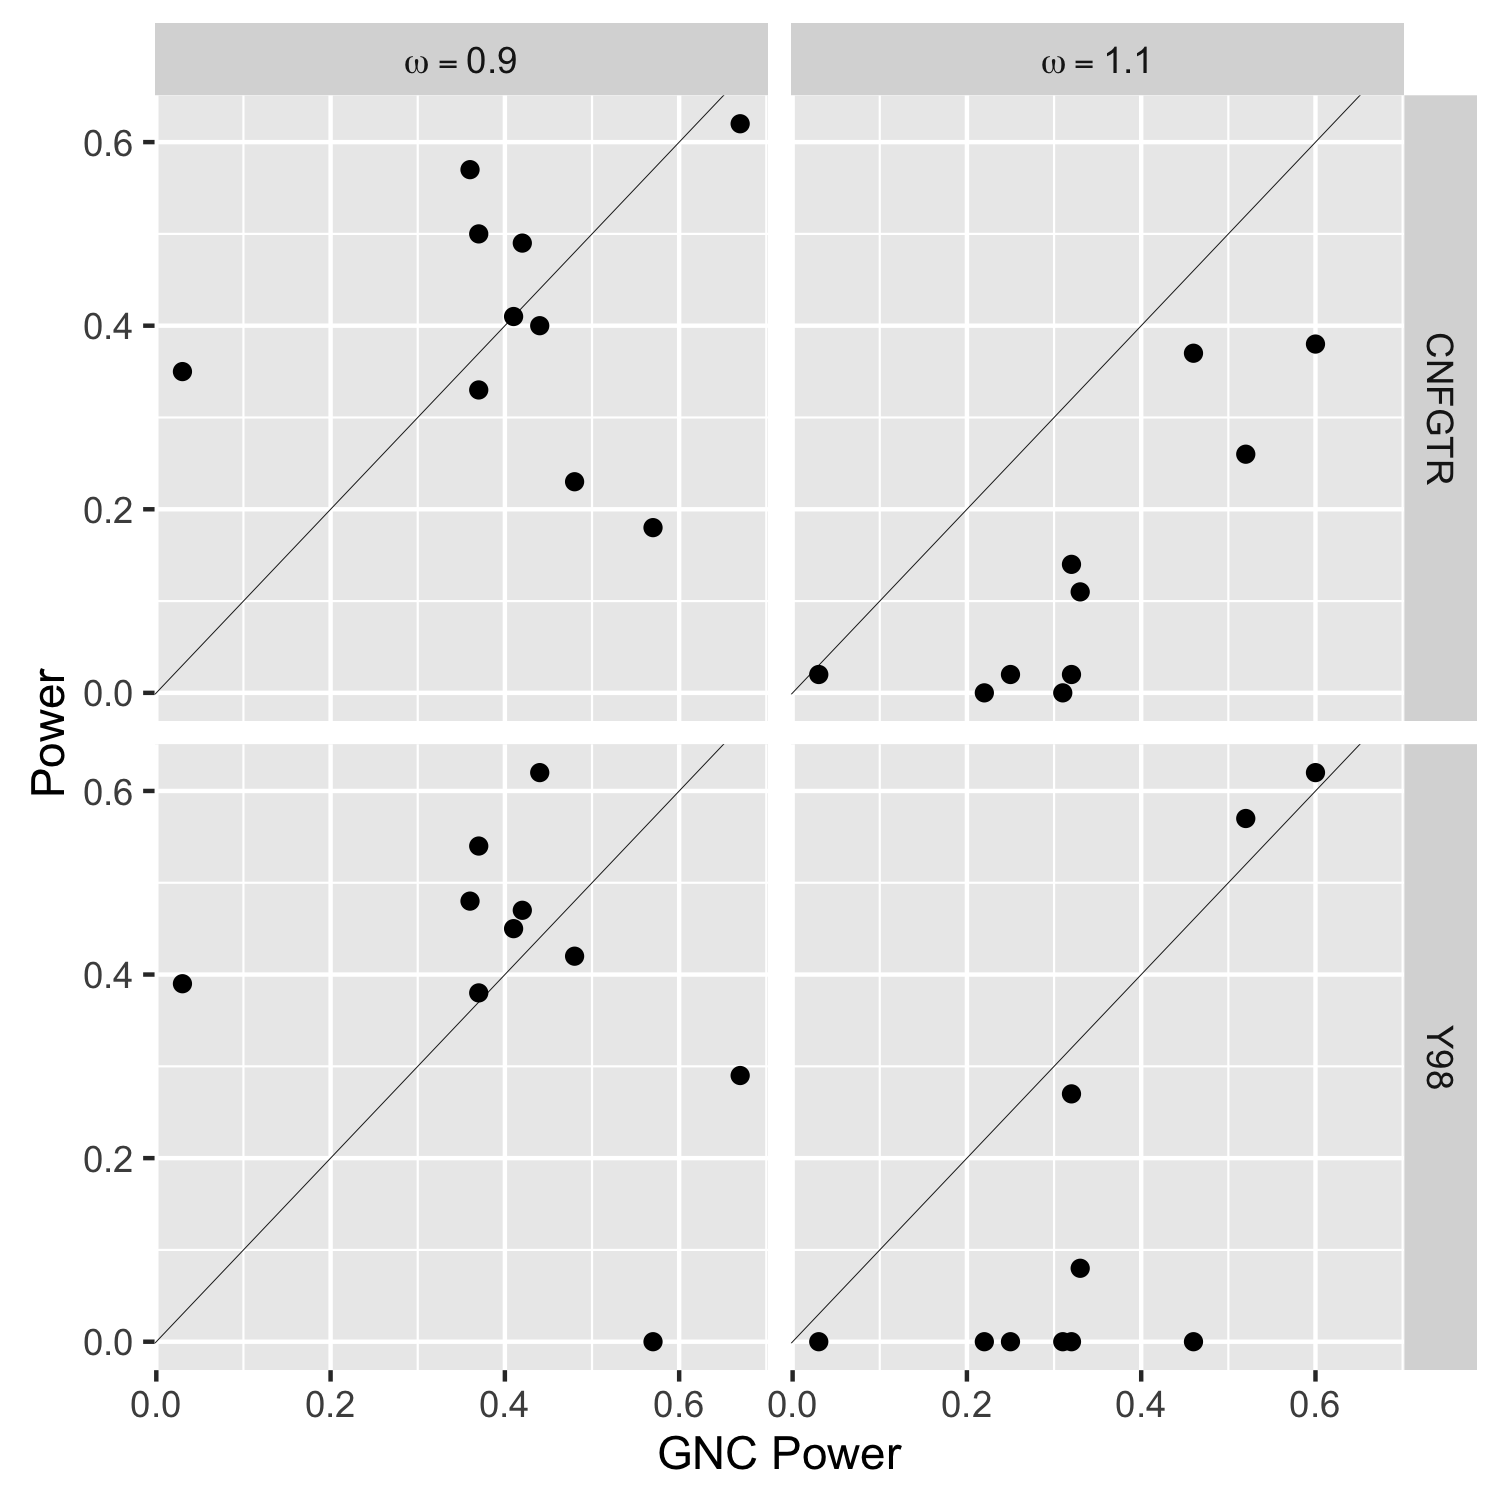

In [72]:
df = DataFrame(rows, columns=columns)
rdf = df[df['omega']!='omega == 1.0']
%R -i rdf gg <- get_plot(rdf, 'GNC Power', 'Power')
name = os.path.join('power', 'sim_power.png')
%R -i name ggsave(name, gg, width=5, height=5)
display(Image(name))